https://www.kaggle.com/cityofLA/los-angeles-city-population-2010

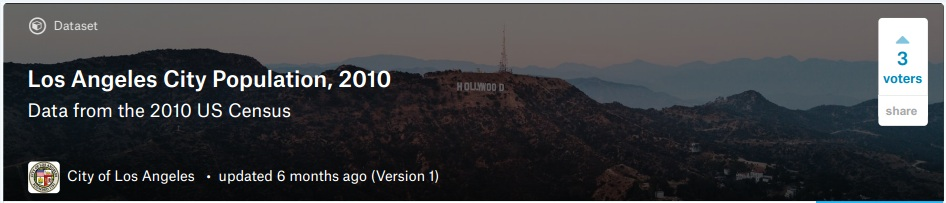

In [1]:
import pandas as pd

In [2]:
uri = 'https://gist.githubusercontent.com/urwinday/7bab67534bc79fd9a1096df22f8b0eac/raw/fab8cd85e07a4def1177ddfb2c55a57825993cef/2010_Census_Populations_by_Zip_Code.csv'
population_df = pd.read_csv(uri)
population_df.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [3]:
population_df.columns = ['Zip_Code', 'Total_Population', 'Median_Age', 
                         'Total_Males','Total_Females', 'Total_Households', 'Average_Household_Size' ]


In [4]:
population_df.columns

Index(['Zip_Code', 'Total_Population', 'Median_Age', 'Total_Males',
       'Total_Females', 'Total_Households', 'Average_Household_Size'],
      dtype='object')

In [5]:
population_df.dtypes

Zip_Code                    int64
Total_Population            int64
Median_Age                float64
Total_Males                 int64
Total_Females               int64
Total_Households            int64
Average_Household_Size    float64
dtype: object

In [6]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
Zip_Code                  319 non-null int64
Total_Population          319 non-null int64
Median_Age                319 non-null float64
Total_Males               319 non-null int64
Total_Females             319 non-null int64
Total_Households          319 non-null int64
Average_Household_Size    319 non-null float64
dtypes: float64(2), int64(5)
memory usage: 17.5 KB


In [7]:
population_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip_Code,319.0,91000.673981,908.360203,90001.0,90243.500,90807.00,91417.00,93591.00
Total_Population,319.0,33241.341693,21644.417455,0.0,19318.500,31481.00,44978.00,105549.00
Median_Age,319.0,36.527586,8.692999,0.0,32.400,37.10,41.00,74.00
Total_Males,319.0,16391.564263,10747.495566,0.0,9763.500,15283.00,22219.50,52794.00
Total_Females,319.0,16849.777429,10934.986468,0.0,9633.500,16202.00,22690.50,53185.00
Total_Households,319.0,10964.570533,6270.646400,0.0,6765.500,10968.00,14889.50,31087.00
Average_Household_Size,319.0,2.828119,0.835658,0.0,2.435,2.83,3.32,4.67


**Считываем значение конкретной ячейки (с конкретным индексом из конкретной колонки)**

In [8]:
population_df.loc[1, 'Total_Population']

57110

In [9]:
population_df.iloc[0, 0]

91371

**Фильтрация строк по диапазону индекса**

In [10]:
population_df.loc[3:8]

,Zip_Code,Total_Population,Median_Age,Total_Males,Total_Females,Total_Households,Average_Household_Size
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
5,90005,37681,33.9,19299,18382,15044,2.50
6,90006,59185,32.4,30254,28931,18617,3.13
7,90007,40920,24.0,20915,20005,11944,3.00
8,90008,32327,39.7,14477,17850,13841,2.33


**Фильтрация данных по какому-либо условию**
 - Median_Age < 20 
 - and
 - Median_Age != 0

In [11]:
population_df[(population_df.Median_Age < 20)&(population_df.Median_Age != 0)]

,Zip_Code,Total_Population,Median_Age,Total_Males,Total_Females,Total_Households,Average_Household_Size
65,90089,3217,19.3,1436,1781,31,1.94
90,90263,1612,19.7,665,947,0,0.00
210,91330,2702,19.6,1103,1599,2,2.50


In [12]:
population_df[(population_df.Total_Population <= 3)&(population_df.Total_Population != 0)]

,Zip_Code,Total_Population,Median_Age,Total_Males,Total_Females,Total_Households,Average_Household_Size
0,91371,1,73.5,0,1,1,1.0
68,90095,3,52.5,2,1,2,1.5


**Работа с пропущенными значениями (если они есть): **
- удаление строк с пропущенными значениями, 
- либо заполнение пропущенных значений средним значением по колонке.

In [13]:
population_df.Total_Households.fillna(0, inplace=True)


**Создание нового поля, вычисленного на основе значений других полей (через выражение на базе имеющихся колонок, либо через df.apply)**

- добавили столбец: процентное отношение мужчин к общему количеству населения по районам.


In [14]:
# добавили столбец
population_df['New_Males_Population'] = population_df['Total_Males']/population_df['Total_Population']*100

In [15]:
population_df.head(10)

,Zip_Code,Total_Population,Median_Age,Total_Males,Total_Females,Total_Households,Average_Household_Size,New_Males_Population
0,91371,1,73.5,0,1,1,1.00,0.000000
1,90001,57110,26.6,28468,28642,12971,4.40,49.847662
2,90002,51223,25.5,24876,26347,11731,4.36,48.564122
3,90003,66266,26.3,32631,33635,15642,4.22,49.242447
4,90004,62180,34.8,31302,30878,22547,2.73,50.340946
5,90005,37681,33.9,19299,18382,15044,2.50,51.216794
6,90006,59185,32.4,30254,28931,18617,3.13,51.117682
7,90007,40920,24.0,20915,20005,11944,3.00,51.111926
8,90008,32327,39.7,14477,17850,13841,2.33,44.782999
9,90010,3800,37.8,1874,1926,2014,1.87,49.315789


**Cортировка по какому-либо из полей**
 - первые 15 записей

In [16]:
population_df.sort_values(by = 'Total_Population', ascending=False).head(15)

,Zip_Code,Total_Population,Median_Age,Total_Males,Total_Females,Total_Households,Average_Household_Size,New_Males_Population
132,90650,105549,32.5,52364,53185,27130,3.83,49.611081
10,90011,103892,26.2,52794,51098,22168,4.67,50.816232
211,91331,103689,29.5,52358,51331,22465,4.60,50.495231
69,90201,101279,27.8,50658,50621,24104,4.16,50.018266
99,90280,94396,29.4,46321,48075,23278,4.05,49.070935
158,90805,93524,29.0,45229,48295,26056,3.56,48.360849
85,90250,93193,31.9,45113,48080,31087,2.98,48.408142
214,91342,91725,31.9,45786,45939,23543,3.83,49.916599
42,90044,89779,28.6,43128,46651,25144,3.55,48.037960
266,91744,85040,30.9,42564,42476,18648,4.55,50.051740


** Вычисление несколько статистик по колонкам (используем встроенные агрегатные функции)**

In [17]:
population_df.Median_Age.mean()

36.52758620689653

In [18]:
population_df.Total_Population.sum()

10603988

In [19]:
population_df.New_Males_Population.max()

93.87755102040816

In [20]:
population_df.Average_Household_Size.median()

2.83

**Сводная таблица** 
 - на основе группировки (.groupby)

In [21]:
population_df[['Total_Population','Total_Males', 'Total_Females',]].groupby(['Total_Population']).sum().head(10)

,Total_Males,Total_Females
Total_Population,,
0,0,0
1,0,1
3,2,1
15,13,2
117,109,8
156,51,105
328,162,166
388,263,125
476,239,237


**Построение гистограммы распределения значений по любой из колонок **
 - Median_Age

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019BC20F0>]]


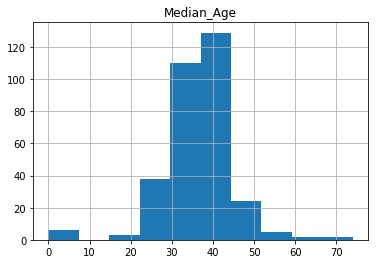

In [23]:
print(population_df.hist('Median_Age'));

## .groupby

В общем случае группировка данных в Pandas выглядит следующим образом:

df.groupby(by=grouping_columns)[columns_to_show].function()

1. К датафрейму применяется метод groupby, который разделяет данные по grouping_columns – признаку или набору признаков.
2. Выбираем нужные нам столбцы (columns_to_show).
3. К полученным группам применяется функция или несколько функций.

In [24]:
# в данном случае групировка позволила выявить количесто почтовых индексов без людей
population_df.groupby(['Total_Females','Total_Males'])['Zip_Code'].count().head(10)

Total_Females  Total_Males
0              0              6
1              0              1
               2              1
2              13             1
8              109            1
33             506            1
105            51             1
125            263            1
166            162            1
237            239            1
Name: Zip_Code, dtype: int64

In [25]:
population_df.groupby('Zip_Code')['Total_Males'].mean().head()

Zip_Code
90001    28468
90002    24876
90003    32631
90004    31302
90005    19299
Name: Total_Males, dtype: int64

In [26]:
population_df[['Zip_Code','Total_Males', 'Total_Females']].groupby(['Zip_Code']).sum().head()

,Total_Males,Total_Females
Zip_Code,,
90001,28468,28642
90002,24876,26347
90003,32631,33635
90004,31302,30878
90005,19299,18382
